# Matplotlib
***
<br>

[Official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

## What is it?
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python programming language [3].<br>
The library utilises a tree-like hierarchy structure to store its objects for each plot [2]. Matplotlib is a free open-sourced library<br>
which is continually improving. 

## Brief History
Matplotlib development started in the early 2000’s by John D. Hunter, a neurobiologist that emulated MATLAB’s capabilities to help<br> 
visualize electronic signals in the brain of epilepsy patients[1]. Despite MATLAB’s limitations, it’s approach to plotting was retained<br>
in the pyplot sub module which was developed to interface with Matplotlib through a collection of functions [3]. 

<br>

## Pyplot
***
### Overview
This sub module is typically imported from the Matplotlib library under the “plt”alias name and can carry out the majority of Matplotlib’s<br> 
plotting capabilities with relatively intuitive syntax.<br>

Plotting via pyplot is considered the stateful approach to plotting with Matplotlib, where calls are made via plt.plot() and other top level<br>
pyplot functions which preserve states to keep track of the current figure and axes [2]. As described in RealPython (2018, Stateful Versus<br>
Stateless Approaches) the simplicity of pyplot’s plotting syntax can be attributed to its wrapper functions that essentially call Matplotlib’s<br>
more complicated object orientated interface.

<br>

### Plotting
Functions can be found here: [pyplot functions](https://matplotlib.org/stable/api/pyplot_summary.html)

The pyplot library can do many different plots via different functions calls. The arguments accepted by the different pyplot plots are<br>
relatively similar, but for simplicity a worked example of a line plot will be explored.



<br>

#### Breakdown of plt.plot()
[Documentation:](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)  _matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)_

This *plot* functon:
- Accepts list of arguements (**args*) which can form a 2d-array via:
  - Lists of equal lengths (as used in *line_plot* function).
  - Numpy arrays of equal length.
  - Keyword strings, such as  reference to pandas dataframe columns.
-  View limits autoscale to data limits by default as scalex and scaley are set to True. This can be altered in the function or after the fact.
-  Data input is defaulted to None but one can pass data object if the object variables are declared.
-  Keyword arguements (***kwargs*) declared in or passed into the *plt.plot()* can format properties  like linewidth and marker color.<br>
One can also use shortcut string notation for some formatting operations (as used in *line_plot* function below, e.g blue dashes line = 'b--').


In [1]:
# Import the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # for numerical operations
import pandas as pd                           # for making dataframes
import requests as rq                         # for making requests from websites
from sklearn import datasets                  # for importing iris dataset

# default figure sizes of future plots in the notebook
plt.rcParams['figure.figsize'] = [10, 6]      

Text(0.5, 0.0, 'Figure 1')

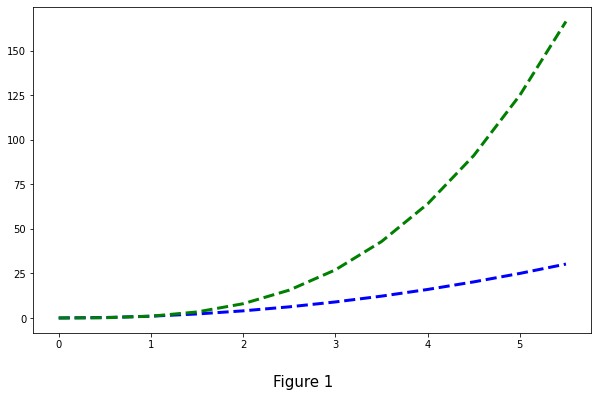

In [2]:

# define plot variables
x = np.arange(0, 6, 0.5)                      # generate list of 0-5 in increments of 0.5
y1 = x ** 2
y2 = x ** 3
y3 = x ** 4

#define plot labels
xy1_label = 'f(x)=x'
xy2_label = 'g(x)=x^2'
xy3_label = 'h(x)=x^3'

def line_plot():   
# pass the following arguements into plot function():
    # x and y lists of equal length
    # Shorthand string notation for colour / linestyle
    # linewidth value & label string (later used to format legend)
    plt.plot(x, y1, 'b--', linewidth = 3, label = xy1_label)  
    plt.plot(x, y2, 'g--', linewidth = 3, label = xy2_label) 
    
line_plot()

# Add Figure Reference
plt.figtext(0.5, 0.0, 'Figure 1', wrap = True, horizontalalignment = 'center', fontsize = 15)  

#### Additional Formatting 

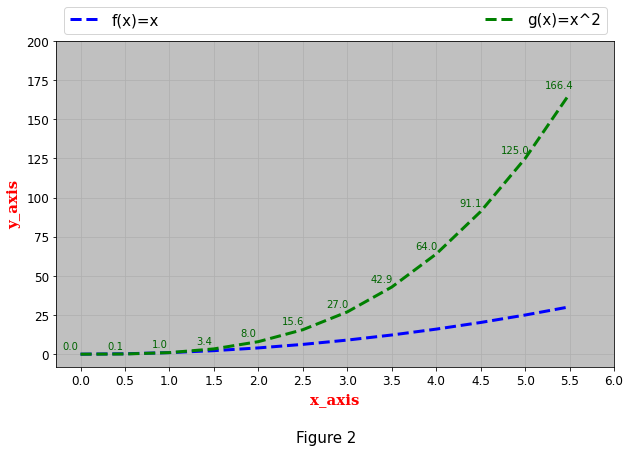

In [3]:
# Additional plot formatting (declared outside of the plot function)

plt.clf() #clear current figure


def format_plot():
    
    # plot format variables
    x_axis_label = 'x_axis'
    y_axis_label = 'y_axis'
    default_fontsize = 12
    label_pad = 5
    axis_font = {'family': 'serif',
        'color':  'red',
        'weight': 'bold',
        'size': 15,
        }

    # set axis labels, declare fontsize and distance from axis (labelpad)
    plt.xlabel(x_axis_label, fontdict = axis_font, labelpad = label_pad)
    plt.ylabel(y_axis_label, fontdict = axis_font, labelpad = label_pad)
    
    # alter scaling of y axis (this can be done in plot function either)
    plt.ylim(top = 200)
    
    # set fontsize of axis labels
    plt.xticks(fontsize = default_fontsize)
    plt.yticks(fontsize = default_fontsize)
    
    # alter tick frequency of x-axis to 0.5
    plt.xticks(np.arange(min(x), max(x) + 1, 0.5))
    
    # set current axis to a variable to call functions on it
    ax = plt.gca()                          # define ax variable as current axes if it exists
    ax.set_facecolor('silver')              # call set_facecolur method current axes
    ax.grid()                               # apply grid to current axes
    
    # annotate datapoint labels on data series
    # loop over index & val of series, then add text via annotate function
    # Adopted from: https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
    for index, value in enumerate(y2):
        value = value.round(1)
        ax.annotate(value, (x[index], y2[index]), textcoords = "offset points", xytext = (-10, 5), ha = 'center',
                    color = 'darkgreen')
    
    # Place a legend on the current Axes (labels taken from artist as label declared in plot function)
    # Note: labels can also be passed as a list to plt.legend() 
        # bbox_to_anchor and loc are used together to position legend
        # mode set to expand stretches legend accross axes length
        # borderaxespad control distance between legend and legend border
    ax.legend(bbox_to_anchor = (0, 1, 1, 0.2), loc = "lower left", mode = "expand",
               borderaxespad = 0.5, ncol = 3, fontsize = 15)

line_plot()   
format_plot()
plt.figtext(0.5, -0.05, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15);

#### Preserving States

When looking at Figure 1 above, the *lineplot()* function plotted two series via two consecutive *plot()* calls. This is an example of how the pyplot<br>
module can make it easier to plot. Pyplot can preserve various states enabling it to keep track of the current figure, whereby functions called are<br>
directed to the current axes. Consecutive *plt.plot()* calls are essentially directing each plot to the same axis. This behaviour can be explained when<br>
one looks at whats happening under the hood.

In [4]:
# Reference [2]
# Abridged version of plt.plot()

def plot(*args, **kwargs):  
    ax = plt.gca()                      # Get the current Axes instance of the current figure or create one if doesnt exist.
    return ax.plot(*args, **kwargs)

def gca(**kwargs):                                 
    return plt.gcf().gca(**kwargs)      # Get the current Axes of the current Figure.


<br>

The same logic can be used when explaining how calling the *format_plot()* function decorated the plot shown in Figure 2 despite the absence <br>
of *plot()* in the format_plot() function. This is because the formatting function calls (e.g plt.xticks()) were directed to the current axes. RealPython<br>
(2018, Stateful Versus Stateless Approaches) explains how almost all pyplot function implicitily refer to an existing Figure and current Axes, or create a<br>
new one if none exist.

#### Generating subplots:
#### The stateful approach: subplot()**
As per the offical [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) the *subplot* funcion adds an axes to the current figure or retrieves the current axis if it exists. The position<br>
of the subplot is determined by the following integer arguements (nrows, ncols, index), whereby a 2x2 grid will be declared via *subplot(2, 2, n)*,<br>where n is the index of the plot.



           Here we can see adding additional axes to a figure can be useful for displaying more plots in a grid
           format. Notice again how the preservation of states is at play as only the last subplot was decorated
           via the format_plot() call. The object orientated (stateless approach) allows easier access to
           subplots and will be briefly explored to show its benifit.



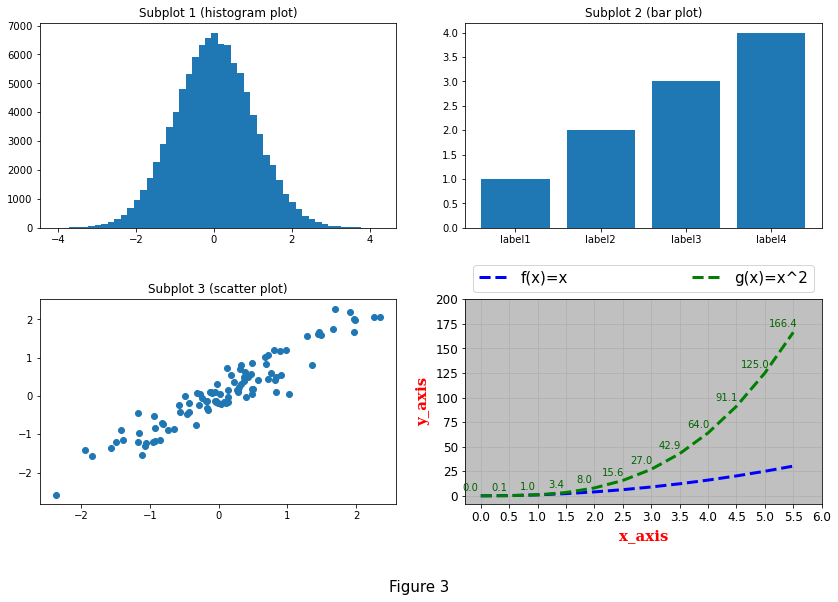

In [5]:
# generate new figure, or activate existing
# (although subplot generates new figure this was used to alter its size)
fig = plt.figure(figsize = (12, 8))
plt.figtext(0.5, -0.05, 'Figure 3', wrap = True, horizontalalignment = 'center', fontsize = 15);

# plot 1: index position 1 in 2x2 grid
plt.subplot(2, 2, 1)   
plt.title('Subplot 1 (histogram plot)')
rng = np.random.default_rng()                                       # instansiate object of numpy generator class
normal_array = rng.normal(0, 1, 100000)                             # get normal standard normal distribution
plt.hist(normal_array, bins = 50)       


# plot 2: index position 2 of 2x2 grid
plt.subplot(2, 2, 2)
plt.title('Subplot 2 (bar plot)')     
plt.bar(['label1', 'label2', 'label3', 'label4'], [1, 2, 3, 4])


# plot 3: index position 3 of 2x2 grid
plt.subplot(2, 2, 3) 
plt.title('Subplot 3 (scatter plot)')
 
# scatter plot data adopted from:
# https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.multivariate_normal.html
mean = [0, 0]
covariance_matrix = [[1, 0.95], [0.95, 1]]
scatter_data = rng.multivariate_normal(mean, covariance_matrix, 100)  # generate two correlated normal arrays
plt.scatter(scatter_data[:, 0], scatter_data[:, 1])                   # plot col 1 vs. col 2 of 2d array


# plot 4: index position 4 of 2x2 grid
plt.subplot(2, 2, 4)
line_plot()                      # call lineplot function( which pots & applies format)
format_plot()
plt.tight_layout(pad = 2)

string_spacer = [' ' * 11 for i in range(4)]
print('\n{}Here we can see adding additional axes to a figure can be useful for displaying more plots in a grid\n\
{}format. Notice again how the preservation of states is at play as only the last subplot was decorated\n\
{}via the format_plot() call. The object orientated (stateless approach) allows easier access to\n\
{}subplots and will be briefly explored to show its benifit.\n'.format(*string_spacer))    

####  The stateless approach: subplots()

The subplots() function generates a figure similar to subplot(), however the subplots figure can hold an array of axes objects. As described by Nyquist (2020),<br>
these axes object can be retrieved and plotting agruements called on them. This is appose to subplot generated figures that direct plotting aruements to the<br>
axes. See Figure 4 below for the cleaner approach with a higher degree of control.


           With the object orientated approach we can directly reference any axes by indexing its 
           matrix position in the grid. This approach gives a greater degree of control and is
           generally a tidier approach.


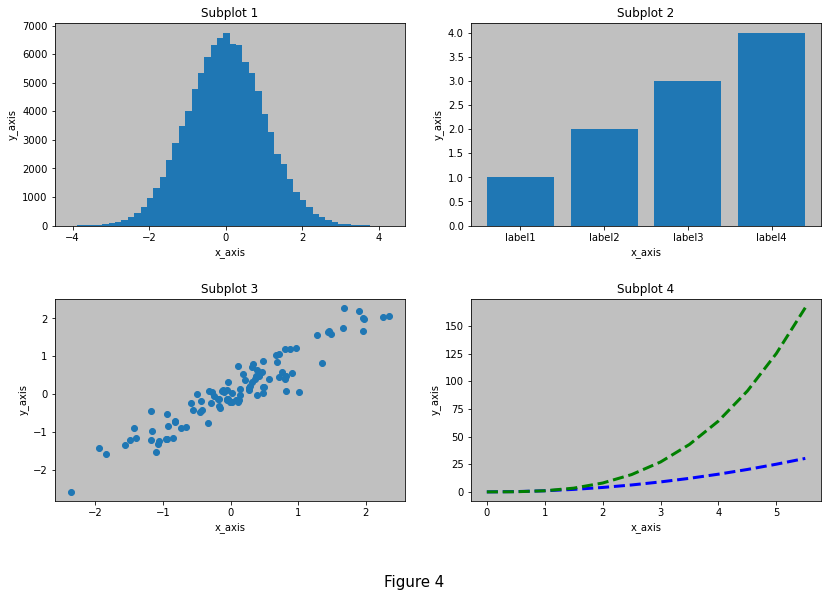

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
plt.figtext(0.5, -0.05, 'Figure 4', wrap = True, horizontalalignment = 'center', fontsize = 15);

# index ax position and call relevant plot functions
axes[0, 0].hist(normal_array, bins = 50)
axes[0, 1].bar(['label1', 'label2', 'label3', 'label4'], [1, 2, 3, 4])
axes[1, 0].scatter(scatter_data[:, 0], scatter_data[:, 1])
axes[1, 1].plot(x, y1, 'b--', linewidth = 3) 
axes[1, 1].plot(x, y2, 'g--', linewidth = 3) 

# loop over axes objects in the figure object
for plot_index, ax in enumerate(fig.axes):  
    ax.set_facecolor('silver')
    ax.set_title(str("Subplot ") + str(plot_index+1))     
    ax.set_xlabel('x_axis')
    ax.set_ylabel('y_axis')
    
fig.tight_layout(pad = 2.5)


string_spacer = [' ' * 11 for i in range(4)]
print('\n{}With the object orientated approach we can directly reference any axes by indexing its \n\
{}matrix position in the grid. This approach gives a greater degree of control and is\n\
{}generally a tidier approach.'.format(*string_spacer))    

## Interesting Plots
***

### Load Iris Data

In [7]:
# lets use the iris dataset to generate some data to work with
iris = datasets.load_iris()              # store dataset in variable
iris_cols = iris.feature_names           # store col names list in variable
iris_targets = iris.target               # store species (numeric format) in targets array
iris_species = iris.target_names         # store species categories in array

In [8]:
# convert iris dataset to dataframe

# declare dict which will be used to make df
iris_dict = {iris_cols[0]: iris.data[:, 0], iris_cols[1]: iris.data[:, 1],  iris_cols[2] : iris.data[:, 2], 
             iris_cols[3] : iris.data[:, 3], 'species' : iris_targets}

# pass dict into DataFrame function and store in df variable
df = pd.DataFrame(iris_dict)
df.replace({'species' : { 0 : 'setosa', 1 : 'versicolor', 2 : 'virginica' }}, inplace = True)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Histogram

The histogram plot (or variations of it) is one of the most fundamental plots used in the arena of data science. This 2D plot is used to view the probability<br>
distribution of continuous (floats) or discrete (integer) data on an interval scale where the variables have order. A histogram plot consists of frequency or<br>
count on the y-axis and the number line pertaining to the variables on the x-axis. The x-axis is particularly interesting as the data is grouped into numerical<br>
intervals called bins. Weitz (2020) details how the frequencty of each bin is represented by its area, whereby the area of all the bins represents a probability<br>
of one. In other words one can get frequency of each bin by taking the under under its bar (i.e: bin height x bin width). He then goes on to explain how<br>
numbers that exactly equal the bin bounderies will be assigned to the left or right of the given interval depending<br>
on the software.

Lets explore the histogram using Matplotlib. One can adjust many of the features of a histogram by passing keyword arguements to the *hist()* of the pyplot<br>
module (see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)). The histograms in figure 5 wont many of the parameters the hisplot function as to offer as their default form is wanted for the plot, these include:

- density = false (i.e returns counts on y-axis)
- *range* = to min & max of array
- *histtype* = bar
- *align* = 'mid'
- rwidth = None (i.e no space between bins)
- bins, density


<br>
 
 <--<table style = 'float : left;'>
<table style='text-align: center'>
    <caption>Table 2 [1]: Distribution Statistics</caption>
     <thead>       
    <thead>      
      <tr>
        <th>Parameter</th>
        <th>Default Value</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody style='text-align: center'>
      <tr>
        <td>Density</td>
        <td>False</td>
        <td>Counts on y-axis</td>
      </tr>
      <tr>
        <td>histtype</td>
        <td>bar-type histogram</td>
        <td>side by side bars</td>
      </tr>
      <tr>
        <td>allign</td>
        <td>mid</td>
        <td>bars centered between bin edges</td>
      </tr>
      <tr>
        <td>rwidth</td>
        <td>None</td>
        <td>No space between bars</td>
      </tr>
    </tbody>
 </table>


<br>
<table style = 'float : left;'>
    <caption>Table 2 [X]: Distribution Statistics</caption>
     <thead>       
    <thead>      
      <tr>
        <th>Variable</th>
        <th>Mean</th>
        <th>Std Dev</th>
        <th>Mean</th>
        <th>Std Dev</th>  
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>BPs [mmHg]</td>
        <td>133.1</td>
        <td>17.0</td>
        <td>127.7</td>
        <td>17.5</td>
      </tr> 
      <tr>
        <td>BPd [mmHg]</td>
        <td>82.5</td>
        <td>11.6</td>
        <td>78.5</td>
        <td>10.6</td>
      </tr>
      <tr>
        <td>Body Fat %</td>
        <td>23.3</td>
        <td>7.0</td>
        <td>29.4</td>
        <td>8.3</td>
      </tr>
      <tr>
        <td>BMI [kg/m²]</td>
        <td>26.8</td>
        <td>3.9</td>
        <td>24.8</td>
        <td>4.6</td>
      </tr>
      <tr>
        <td>Age</td>
        <td>46.1</td>
        <td>16.6</td>
        <td>45.4</td>
        <td>15.4</td>
      </tr>
    </tbody>
 </table>

In [ ]:
orientation{'vertical', 'horizontal'}
'''
bins=None, 
range=None, 
density=False, 
weights=None, 
cumulative=False, 
bottom=None, 
histtype='bar', 
align='mid', 
orientation='vertical', 
rwidth=None, log=False, 
color=None, label=None, 
stacked=False)
'''

count, bins, ignored = plt.hist(normal_array, 100, density = True)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 7 11  9  4  5 13  4  7 13 11 16]


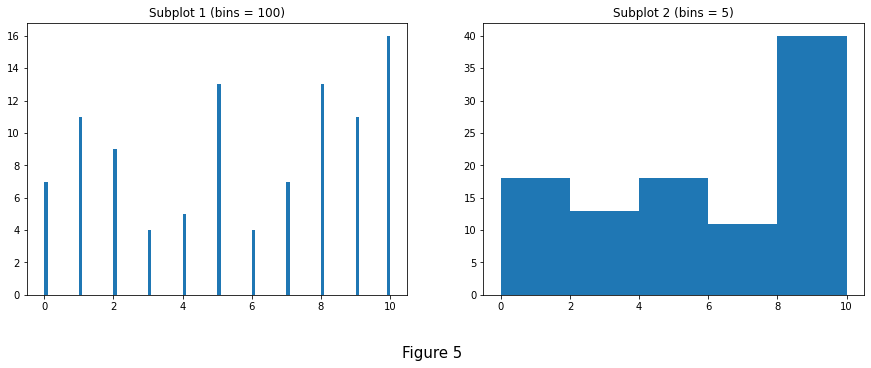

In [152]:
# exploring how bins work

# generate new figure, or activate existing
fig = plt.figure(figsize = (15, 5))
plt.figtext(0.5, -0.05, 'Figure 5', wrap = True, horizontalalignment = 'center', fontsize = 15);

# generate 100 random ints from 0 to 10
rand_ints = rng.integers(0, 11, 100)                                  

# plot 1: large number of bins
plt.subplot(121)                                               # create figure, 1row, 2 cols, index 1            
plt.title('Subplot 1 (bins = 100)')                            # title on subplot
plt.hist(rand_ints, bins = 100)                                # plot hist showing counts on y-axs (density = False)

# plot 2: medium number of bins
plt.subplot(122)                                               # add to  figure at index 2            
plt.title('Subplot 2 (bins = 5)')                              # title on subplot
plt.hist(rand_ints, bins = 5)                                  # plot hist showing counts on y-axis (density = False)

#{'bar', 'barstacked', 'step', 'stepfilled'})   


# density  (True : returns frequency, False: returns count)
unique, counts = np.unique(rand_ints, return_counts = True)    # return unique counts values and their counts 
print('{}\n{}'.format(unique, counts))                         # print x-axis and y-axis arrays

[ 6 10 10  7  9  5 16  6 10 21]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


(array([ 6.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0., 10.,  0.,  0.,
         0.,  0.,  7.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  5.,
         0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,
         0., 10.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0., 13.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <BarContainer object of 50 artists>)

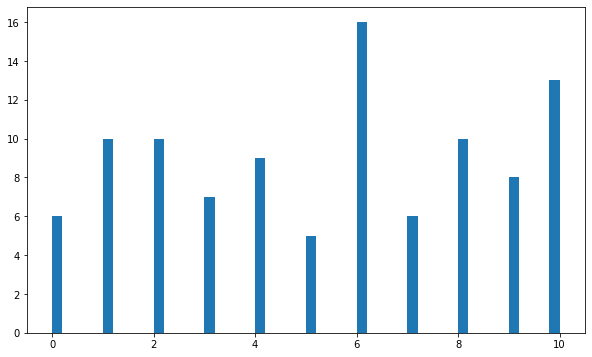

# Why: a histogram is a graphical representation of the distribution of a dataset. Although its appearance is similar to that of a standard bar graph, instead of making comparisons between different items or categories or showing trends over time, a histogram is a plot that lets you show the underlying frequency distribution or the probability distribution of a single continuous numerical variable.
Let me clarify that a probability distribution indicates all the possible values ​​that a certain random variable can take plus a summary of probabilities for those values. Also to put it simply, a continuous numerical variable is the one that can take on an unlimited number of values within a range or interval. For example: height, weight, age, temperature.<br><br><br>
How: histograms are two-dimensional plots with two axes; the vertical axis is a frequency axis whilst the horizontal axis is divided into a range of numeric values (intervals or bins) or time intervals. The frequency of each bin is shown by the area of vertical rectangular bars. Each bar covers a range of continuous numeric values of the variable under study. The vertical axis shows frequency values derived from counts for each bin.
The midpoint value is the one that gives the name to the interval. When a numerical value corresponds exactly to one of the boundaries of the interval, it will be assigned to the left or right interval according to the default setting of the visualization tool. Some tools have the possibility to modify this default setting to accommodate it to the preferences or needs of the users.<br><br><br>
Histograms sometimes have bars of unequal width. However, it is usual to plot them with the same width in order to represent equal ranges of data for each interval. As a counterexample the following case can be indicated: collect data from individuals in a population, split the data between bins of 10-year age ranges but accumulate in a single interval data from people over 75 years old. When the binwidth is the same for all intervals, it is equivalent to replace the bar area with the bar length.

### Violin Plot

In [10]:
'''
# request image from website
response = rq.get("https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/_images/ViolinPlot-boxplot.png")

# open binary file and write to Images folder
image = open("Images/boxplot_vs_violin.png", "wb")
image.write(response.content)
image.close()

# image ref:
# Orange Data Mining (2015). Available at: https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/_images/ViolinPlot-boxplot.png 
# (Accessed 17 December 2021).
print('\n' + ' ' * 22 + 'Image 1')
'''

'\n# request image from website\nresponse = rq.get("https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/_images/ViolinPlot-boxplot.png")\n\n# open binary file and write to Images folder\nimage = open("Images/boxplot_vs_violin.png", "wb")\nimage.write(response.content)\nimage.close()\n\n# image ref:\n# Orange Data Mining (2015). Available at: https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/_images/ViolinPlot-boxplot.png \n# (Accessed 17 December 2021).\nprint(\'\n\' + \' \' * 22 + \'Image 1\')\n'

<img src="Images/boxplot_vs_violin.png" alt="drawing" width="500"/>

#### Plot Description
These plots are very interesting as they esentially combine boxplots and kernal density plots and compliment eachother very well. Lewinson (2019) details how,<br>
like the boxplot, the violin plot shows the median, 25th percentile, 75th percentile, upper / lower adjacent values and outliers. To add to this it shows the entire<br>
distribution flipped on the side of the altered boxplot. Lets explore the violin plot further:

- The interquartile range (IQR) is comprised of the Q1 (25th percentile), median (50th percentile) and Q3 (75th percentile). The percentile tells you that n % of<br>
values lie below the given percentile. For example looking at the upper quartile one would be able to deduce that 25% of the values lie above this marker.
- The min / max points indicate the lowest / highest values and can be derived via nth quartile +/- 1.5 IQR.
- In addition to seeing the data spread one can also see the entire distribution of the data via the kernal density estimator. This is extremely useful as in some<br>
cases it can be hard to visualise the distribution from a boxplot. Although Image 1 is not such a case, it is very apparent that data is normaly distributed.
- The plot also yields information on outliers. The range from the min or max to their distribution tail resresents the distribution of outliers in the data.


In [10]:
# code customised from:
# https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py

def format_violin_plot(data, x_labels):
    # calc the n-th percentile of the data along first axis
    # notice how the iris arrays are transposed to 1D for percentrile calc
    quartile1, median, quartile3 = np.percentile(data, [25, 50, 75], axis = 1)

    # decorating the violin plot
    x_series = np.arange(1, len(median) + 1)                                               # define x series 
    plt.scatter(x_series, median, marker = 'o', color = 'w', s = 50, zorder = 3)           # plot median marker
    plt.vlines(x_series, quartile1, quartile3, color = 'black', linestyle = '-', lw = 10)  # plot interquartile range   
    xticks_list = np.insert(x_labels, 0, '', axis = 0)                                      # add space to start of x-labels list
    plt.xticks(np.arange(len(xticks_list)), xticks_list)                                    # pass xtick list (defined previously) 
    return

In [11]:
# isolate different species of iris array and collapese to 1d

petal_length_setosa = iris.data[:, 2][np.where(iris.target == 0)].flatten()
petal_length_versicolor = iris.data[:, 2][np.where(iris.target == 1)].flatten()
petal_length_virginica = iris.data[:, 2][np.where(iris.target == 2)].flatten()

# Stack arrays in sequence (row wise)
all_species = np.vstack((petal_length_setosa, petal_length_versicolor, petal_length_virginica))

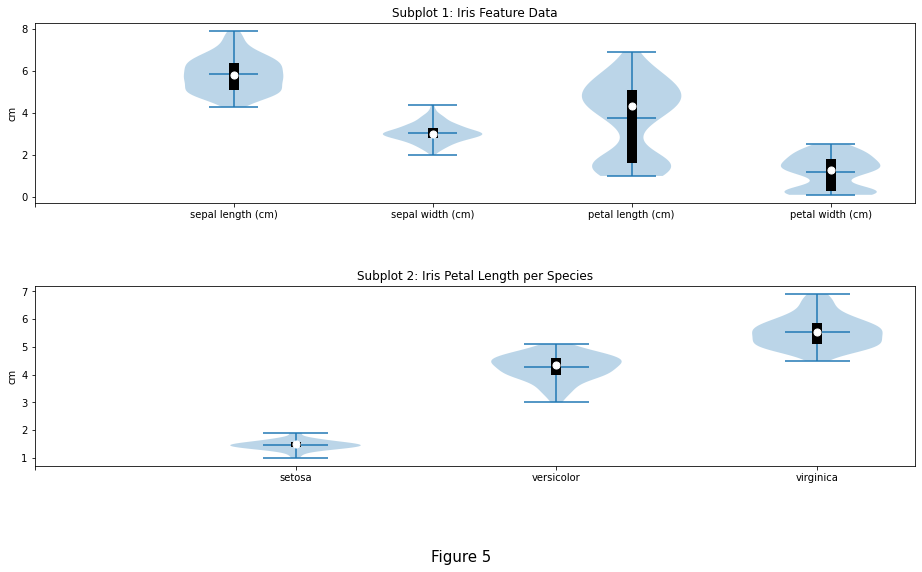

In [12]:
# generate figure of custom size & label figure
plt.figure(figsize = (14, 8))
plt.figtext(0.5, -0.05, 'Figure 5',wrap = True, horizontalalignment = 'center', fontsize = 15)


# bottom violin plot can accepts all feature data in 2d array from iris object
# plot violin, pass first four array cols of 2d array
plt.subplot(2, 1, 1)  
violin_plot = plt.violinplot(iris.data, showmeans = True, showextrema = True)           
plt.title('Subplot 1: Iris Feature Data')
plt.ylabel('cm')

# pass 2d feature data into custom formatting function with the x axis labels
format_violin_plot(iris.data.T, iris_cols)


# top violin plot can accept all species as 2d array (hence use of Transpose)
plt.subplot(2, 1, 2) 
violin_plot = plt.violinplot(all_species.T, showmeans = True, showextrema = True)
plt.title('Subplot 2: Iris Petal Length per Species')
plt.ylabel('cm')

# pass stacked species data into custom formatting function with the x axis labels
format_violin_plot(all_species, iris_species)



# optimise plot boudneries
plt.tight_layout(pad = 5)

#### Real World Analysis

**Fig 5: Subplot 1**<br>

- **Sepals**:<br>
The KDE's show somewhat of normal distribution for the sepal features despite there being 3 different species present in the distribution. For the given sepal<br>
feature this would suggest that the intra-species distribution has degree of normality, with the inter-species distribution overlapping at least enough to yield<br>
the KDEs shown. The mode and median values also appear similar for the given sepal fearues, along with a somewhat symmetrical interquartile range, more <br>
evidence of normality.
- **Petals**:<br>
The Petal Features show somewhat of a bi-modal distirbution (i.e with two local maximums present)[Ye 2020]. This distribution may be due to differences in the<br>
inter-species distribution and will be explored more in Subplot 2 for petal length below.<br>
- **General**:<br>The features lengths are larger than the feature widths for the most part. Petal width data range is the greatest. Sepal Width data ovelaps the least with other<br>
features.<br><br>

**Fig 5: Subplot 2**<br>
When the petal length feature is broken into its species one can see the Setosa species is well separated from Versicolor and Virginica. The distribution is now shown<br>
as somewhat normal for Versicolor and Virginica, whearas the serosa probability distribution appears very sharp, potentially a lognormal distribution? One could plot a<br>
histogram to further investige this. The Virginica species feature length > Versicolor > Setosa.

### Scatter Plot
***
#### Plot Description

Scatter plots are very useful plots as they can show the association between two variables plotted agaisnt eachother. McDonald (2021) details how scatter plots work best<br>
when analyzing two continuous variables (floats) as plotting discrete variables results in a higher probability of data points overlapping and loss of information. Although<br>
scatter plots dont give quantitative data on level or association between variables, one can quickly get visual information on the expression of quantitative change. Figure 6<br>
below shows how visual a scatter plot can be in revealing different levels of correlation between two variables, correlation referring to the strength of association and the<br>
direction of the relationship [Magiya 2019].

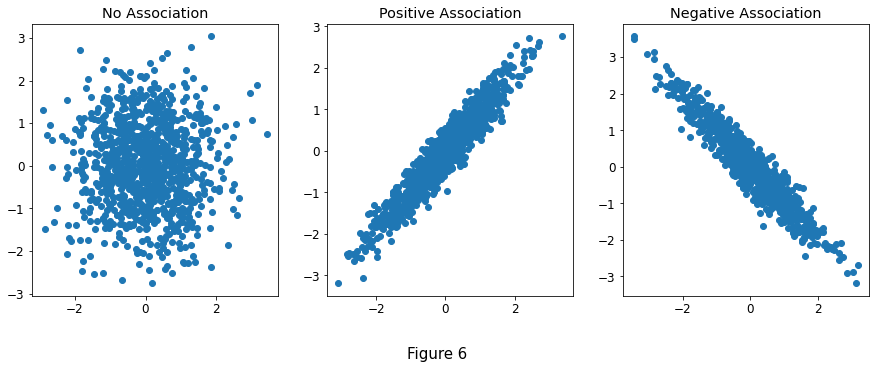

In [57]:
# plot description code
# generate 1x3 grid
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
plt.figtext(0.5, -0.05, 'Figure 6',wrap = True, horizontalalignment = 'center', fontsize = 15)

# generate two correlated normal arrays
mean = (0, 0)

# generate 3x correlated bivariate arrays by passing mean and correlation matrix
scatter_subplot1 = rng.multivariate_normal(mean, [[1, 0], [0, 1]], 1000)  
scatter_subplot2 = rng.multivariate_normal(mean, [[1, 0.95], [0.95, 1]], 1000)  
scatter_subplot3 = rng.multivariate_normal(mean, [[1, -0.95], [-0.95, 1]], 1000)  

ax1.scatter(scatter_subplot1[:, 0], scatter_subplot1[:, 1])
ax2.scatter(scatter_subplot2[:, 0], scatter_subplot2[:, 1])
ax3.scatter(scatter_subplot3[:, 0], scatter_subplot3[:, 1])                   

ax1.set_title('No Association')
ax2.set_title('Positive Association')
ax3.set_title('Negative Association');

#### Real World Analysis
On analysis of Figure 7 below one can see that petal length and petal width features appeared to have a strong positive correlation, that is to say that as petal length increases<br>
petal width also increases (in a linear fashion) Sepal length vs petal length and sepal length vs petal width data also shows a strong positive correlation. One can also see a<br>
relatively weak negative correlation at play between sepal width and petal length. 

Figure 7 is a good example if how a scatterplot matrix can also give information on degree of multicollinearity in a dataset. Multicollinearity occurs when one feature variable<br>
is highly linearly correlated with another feature variable (Saslow (2018), therefore making it harder to identify the target variable through the overlapping correlation. On can<br>
see petal length and petal width features have a strong positive correlation with the sepal length feature, and although correlation doesnt imply causation this will likely effect<br>
effects a machine learning models ability to predict a target species given all these features. When complimented with the likes of a Pearson's Correlation Matrix, the scatterplot<br>
not only helps identify variable relationships, but can help with feature selection for a given machine learning model.


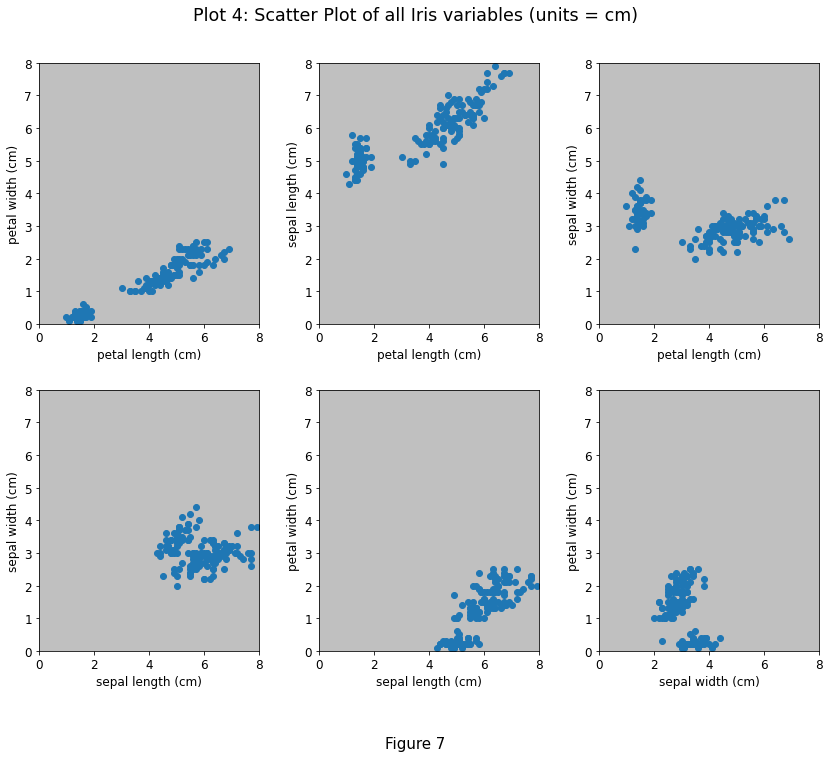

In [56]:
# Real World Analysis Code
plt.rcParams.update({'font.size': 12})

# put each iris array combo in a list of tuples (to be indexed later)
combination_list = [('petal length (cm)', 'petal width (cm)'), 
                    ('petal length (cm)', 'sepal length (cm)'),
                    ('petal length (cm)', 'sepal width (cm)'), 
                    ('sepal length (cm)', 'sepal width (cm)'), 
                    ('sepal length (cm)', 'petal width (cm)'), 
                    ('sepal width (cm)', 'petal width (cm)')]

    
fig, ax = plt.subplots(2, 3, figsize = (12, 10))
plt.figtext(0.5, -0.05, 'Figure 7',wrap = True, horizontalalignment = 'center', fontsize = 15)
fig.suptitle('Plot 4: Scatter Plot of all Iris variables (units = cm)',fontsize = 17.5)
plt.subplots_adjust(wspace = 0.25, hspace = 0.25, top = 0.95)  


def plot_multi_scatter(subplot_index, col_strings):
    '''This function can plot scatter plots in a loop using subplots indexes and df col ref parameters'''
    # plot formatting: uses passed_subplots index to refer to correct ax
    ax[subplot_index].scatter(df[col_strings[0]], df[col_strings[1]])
    ax[subplot_index].set_xlabel(col_strings[0], fontsize = 12)
    ax[subplot_index].set_ylabel(col_strings[1], fontsize = 12)
    ax[subplot_index].set_xlim([0, 8])
    ax[subplot_index].set_ylim([0, 8])
    ax[subplot_index].set_facecolor('silver')              
    return


# generate 2d (2 x 3) array  
arr = np.arange(18).reshape(2, 3, 3)

# iterate over 2d array and return tuple of indices and a count on the index
for count, idx in enumerate(np.ndindex(arr.shape[:2])):
    plot_multi_scatter(idx, combination_list[count])   

fig.tight_layout(pad = 2)

## References<br>

<br>

[1]. What is Matplotlib?, 2021, Available at: 
<br>https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.01-What-is-Matplotlib/<br>
(Accessed 08 October 2021).<br>
<br>


[2]. RealPython, 2018, Python Plotting With Matplotlib (Guide), Stateful Versus Stateless Approaches, Available at:<br>
https://realpython.com/python-matplotlib-guide/#stateful-versus-stateless-approaches<br>
(Accessed 15 October 2021).<br>



<br>

[3] J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.<br>

<br>


[4]. Nyquist, K, 2020 plt.subplot() or plt.subplots()? Understanding state-based vs. object-oriented programming in Pyplot,<br>
towards data science, Availabile at: [Ref Link X ](https://towardsdatascience.com/plt-subplot-or-plt-subplots-understanding-state-based-vs-object-oriented-programming-in-pyplot-4ba0c7283f5d) (Accessed 07 December 2021).

<br>

[5]. Lewinson, E, 2019, Violin plots explained, towards data science, Available at: [Ref LinkX](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d) (Accessed 17 December 2021).


<br>

[X]. Ye, A, 2020, viewed 22 April 2021, All the distributions you need to know, towards data science, Available at:<br>
[Ref Link X](https://towardsdatascience.com/all-the-distributions-you-need-to-know-ad570514987b.) (Viewed 22 December 2021).

<br>

[X]. McDonald, A, 2021, Enhance Your Plotly Express Scatter Plot With Marginal Plots, towards data science, Available at:<br>
[Ref Link X](https://towardsdatascience.com/tagged/scatter-plots) (Accessed 22 December 2021).

<br>


[X]. Magiya, J, 2019, Pearson Coefficient of Correlation Explained, towards data science, Available at:<br>
[Ref Link X](https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404) (Accessed 22 December 2021).


<br>

Not yet used: <br>
[X] Nyquist, K 2020, Seeing state-based and object-oriented programming side-by-side, towardsdatascience, viewed x x x,<br>
https://towardsdatascience.com/plt-subplot-or-plt-subplots-understanding-state-based-vs-object-oriented-programming-in-pyplot-4ba0c7283f5d<br>

<br>

[X]. Saslow, E, 2018, Collinearity - What it means, Why its bad, and How does it affect other models?medium.com, Available at:<br>
[Ref Link X](https://medium.com/future-vision/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168) (Accessed 22 Decmember 2021)

<br>

Weitz, D, 2020, Histograms, Why & How, Storytelling, Tips & Extensions, towards data science, Available at:<br>
[Ref Link X](https://towardsdatascience.com/histograms-why-how-431a5cfbfcd5) (Accessed 29 December 2021).

<br>


<br>


<br>

